# Importing Libraries

In [ ]:
# ========== Standard Library Imports ==========
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress INFO/WARNING logs
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'  # Reduce plugin loading issues

# ========== Data Handling & Visualization ==========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# ========== Scikit-learn Tools for Evaluation & Preprocessing ==========
from sklearn.metrics import confusion_matrix, classification_report, auc, precision_recall_curve, precision_score, recall_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# ========== TensorFlow / Keras for Deep Learning ==========
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, SimpleRNN, Dropout, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = pd.read_csv('/content/drive/MyDrive/Sentimental_Analysis_Dataset/twitter_training.csv')
test_dir = pd.read_csv('/content/drive/MyDrive/Sentimental_Analysis_Dataset/twitter_validation.csv')
columns = ['Tweet ID', 'entity', 'sentiment', 'Tweet content']

train_dir.columns = columns
test_dir.columns = columns

# Train Dataset

In [ ]:
train_dir.head()

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
train_dir.tail()

,Tweet ID,entity,sentiment,Tweet content
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [ ]:
train_dir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74681 non-null  int64 
 1   entity         74681 non-null  object
 2   sentiment      74681 non-null  object
 3   Tweet content  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
train_dir.describe()

,Tweet ID
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [ ]:
train_dir.shape

(74681, 4)

In [ ]:
train_dir.columns

Index(['Tweet ID', 'entity', 'sentiment', 'Tweet content'], dtype='object')

In [ ]:
train_dir.isnull().sum()

,0
Tweet ID,0
entity,0
sentiment,0
Tweet content,686


In [ ]:
train_dir.duplicated().sum()
train_dir.drop_duplicates(inplace=True)

In [ ]:
train_dir.drop(columns=['Tweet ID'], inplace=True)
train_dir

,entity,sentiment,Tweet content
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...
74676,Nvidia,Positive,Just realized that the Windows partition of my...
74677,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
train_dir['entity'].value_counts()

,count
entity,
TomClancysRainbowSix,2344
Verizon,2328
MaddenNFL,2324
CallOfDuty,2322
Microsoft,2319
NBA2K,2306
WorldOfCraft,2304
LeagueOfLegends,2303
TomClancysGhostRecon,2301


In [ ]:
train_dir['sentiment'].value_counts()

,count
sentiment,
Negative,21787
Positive,19810
Neutral,17800
Irrelevant,12584


In [ ]:
train_dir = train_dir[train_dir['sentiment'] != 'Irrelevant']

In [ ]:
train_dir['sentiment'].value_counts()

,count
sentiment,
Negative,21787
Positive,19810
Neutral,17800


In [ ]:
train_dir['Tweet content'].isnull().sum()

279

In [ ]:
train_dir.dropna(subset=['Tweet content'], inplace=True)

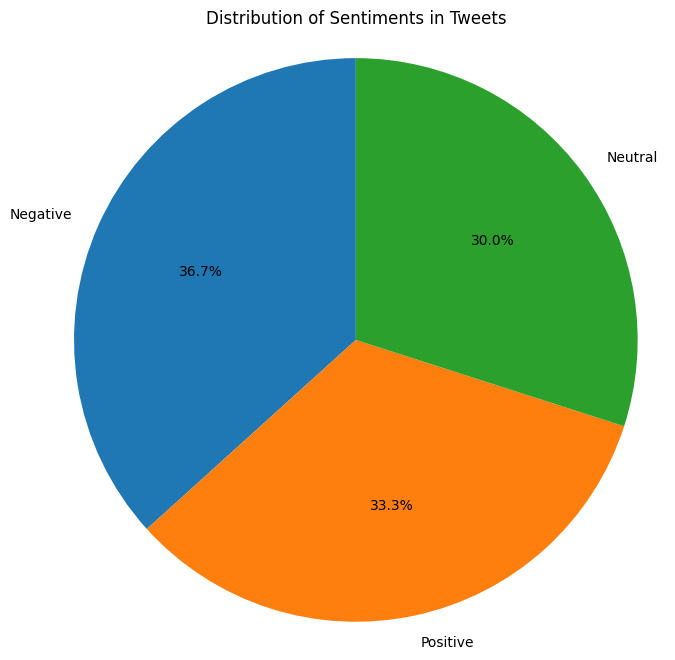

In [ ]:
sentiment_counts = train_dir['sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiments in Tweets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Test Dataset

In [ ]:
test_dir.head()

,Tweet ID,entity,sentiment,Tweet content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
test_dir.tail()

,Tweet ID,entity,sentiment,Tweet content
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
998,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [ ]:
test_dir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       999 non-null    int64 
 1   entity         999 non-null    object
 2   sentiment      999 non-null    object
 3   Tweet content  999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


In [ ]:
test_dir.describe()

,Tweet ID
count,999.000000
mean,6435.159159
std,3728.912226
min,6.000000
25%,3241.500000
50%,6560.000000
75%,9662.500000
max,13197.000000


In [ ]:
test_dir.shape

(999, 4)

In [ ]:
test_dir.columns

Index(['Tweet ID', 'entity', 'sentiment', 'Tweet content'], dtype='object')

In [ ]:
test_dir.isnull().sum()

,0
Tweet ID,0
entity,0
sentiment,0
Tweet content,0


In [ ]:
test_dir.duplicated().sum()
test_dir.drop_duplicates(inplace=True)

In [ ]:
test_dir.drop(columns=['Tweet ID'], inplace=True)
test_dir

,entity,sentiment,Tweet content
0,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Google,Neutral,Now the President is slapping Americans in the...
4,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...
994,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
test_dir['entity'].value_counts()

,count
entity,
RedDeadRedemption(RDR),40
johnson&johnson,39
PlayerUnknownsBattlegrounds(PUBG),38
FIFA,38
LeagueOfLegends,37
ApexLegends,36
Nvidia,35
TomClancysRainbowSix,35
GrandTheftAuto(GTA),35


In [ ]:
test_dir['sentiment'].value_counts()

,count
sentiment,
Neutral,285
Positive,277
Negative,266
Irrelevant,171


In [ ]:
test_dir = test_dir[test_dir['sentiment'] != 'Irrelevant']

In [ ]:
test_dir['sentiment'].value_counts()

,count
sentiment,
Neutral,285
Positive,277
Negative,266


In [ ]:
test_dir['Tweet content'].isnull().sum()

0

In [ ]:
test_dir.dropna(subset=['Tweet content'], inplace=True)

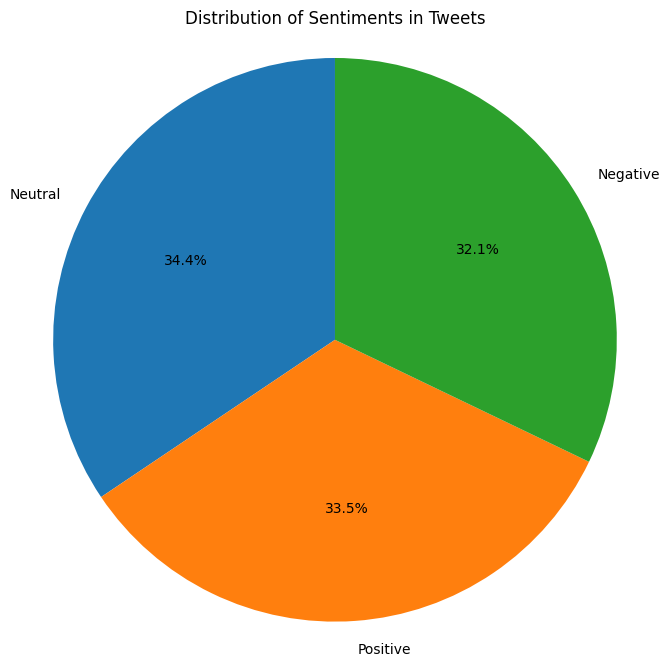

In [ ]:
sentiment_counts = test_dir['sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiments in Tweets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Split 80% train, 20% validation

In [ ]:
# Split 80% train, 20% validation, stratified by sentiment to keep class balance
train_data, val_data = train_test_split(
    train_dir,
    test_size=0.2,
    random_state=42,
    stratify=train_dir['sentiment']
)

# Text Preprocessing for Sentiment Analysis

## Hyperparameters for Text Tokenization and Padding

In [ ]:
# Maximum number of words to keep based on word frequency
max_words = 5000

# Maximum length of each input sequence (in words); shorter sequences will be padded
max_len = 100

## Tokenization and Padding of Tweet Texts

In [ ]:
# Initialize tokenizer
tokenizer = Tokenizer(num_words=max_words)

# Fit tokenizer on train texts only
tokenizer.fit_on_texts(train_data['Tweet content'])

# Convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(train_data['Tweet content'])
val_sequences = tokenizer.texts_to_sequences(val_data['Tweet content'])
test_sequences = tokenizer.texts_to_sequences(test_dir['Tweet content'])

# Pad sequences to fixed length
train_padded = pad_sequences(train_sequences, maxlen=max_len)
val_padded = pad_sequences(val_sequences, maxlen=max_len)
test_padded = pad_sequences(test_sequences, maxlen=max_len)

## Data Preparation

In [ ]:
# Assign padded tweet sequences to training features
X_train = train_padded

# Assign corresponding sentiment labels as training targets
y_train = train_data['sentiment']

# Assign padded tweet sequences to validation features
X_val = val_padded

# Assign corresponding sentiment labels as validation targets
y_val = val_data['sentiment']

# Assign padded tweet sequences to testing features (from test_dir)
X_test = test_padded

# Assign corresponding sentiment labels as testing targets
y_test = test_dir['sentiment']

## Encoding Sentiment Labels

In [ ]:
# Create a LabelEncoder instance
le = LabelEncoder()

# Fit label encoder on train labels only
y_train = le.fit_transform(train_data['sentiment'])
y_val = le.transform(val_data['sentiment'])
y_test = le.transform(test_dir['sentiment'])

# Convert labels to categorical (one-hot)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# Model Phase

## RNN Model

In [ ]:
# Clear Backend Session
tf.keras.backend.clear_session()

# Model Build
model = Sequential([
    # Embedding layer to convert word indices into dense vectors of fixed size
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),

    # Bidirectional SimpleRNN to capture context from both past and future
    # L2 regularization is used to prevent overfitting
    Bidirectional(SimpleRNN(64, return_sequences=False, kernel_regularizer=l2(0.001))),

    # Dropout layer to randomly drop 60% of neurons during training for regularization
    Dropout(0.6),

    # Dense layer with ReLU activation and L2 regularization for learning non-linear features
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),

    # Additional Dropout layer to further reduce overfitting
    Dropout(0.5),

    # Output layer with softmax activation for multiclass classification (3 classes)
    Dense(3, activation='softmax')
])

# Define input shape for the model (batch_size=None, sequence_length=max_len)
model.build(input_shape=(None, max_len))

# Model Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 64)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 344,963 (1.32 MB)

 Trainable params: 344,963 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

## Early Stopping

In [ ]:
# Early Stopping Callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

## Train the model

In [ ]:
history = model.fit(
    X_train,        # training features (padded sequences)
    y_train,        # training labels (one-hot encoded)
    validation_data=(X_val, y_val),  # validation features and labels
    epochs=30,
    batch_size=64,
    callbacks=[early_stopping]
)

Epoch 1/30
739/739 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.4221 - loss: 1.2081 - val_accuracy: 0.6999 - val_loss: 0.7761
Epoch 2/30
739/739 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7547 - loss: 0.6791 - val_accuracy: 0.7835 - val_loss: 0.5867
Epoch 3/30
739/739 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.8493 - loss: 0.4529 - val_accuracy: 0.7963 - val_loss: 0.5667
Epoch 4/30
739/739 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8872 - loss: 0.3410 - val_accuracy: 0.8228 - val_loss: 0.5053
Epoch 5/30
739/739 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9108 - loss: 0.2851 - val_accuracy: 0.8259 - val_loss: 0.5036
Epoch 6/30
739/739 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.9229 - loss: 0.2420 - val_accuracy: 0.8208 - val_loss: 0.5564
Epoch 7/30
739/739 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9305 - loss: 0.2216 - val_accuracy: 0.8277 - val_loss: 0.5422
Epoch 8/30
739/739 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9368 - loss: 0.2018 - 

# Model Training Metrics

## Evaluate the model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss*100:.4f}")
print(f"Test Accuracy: {accuracy * 100:.4f}%")

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8945 - loss: 0.3604
Test Loss: 0.3556
Test Accuracy: 89.13%


## Model (Accuracy and Loss)

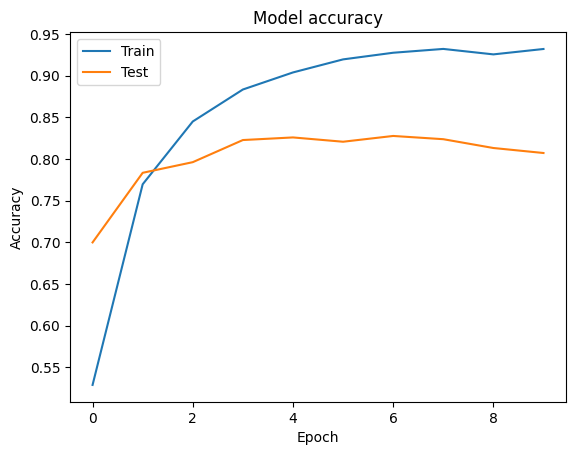

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

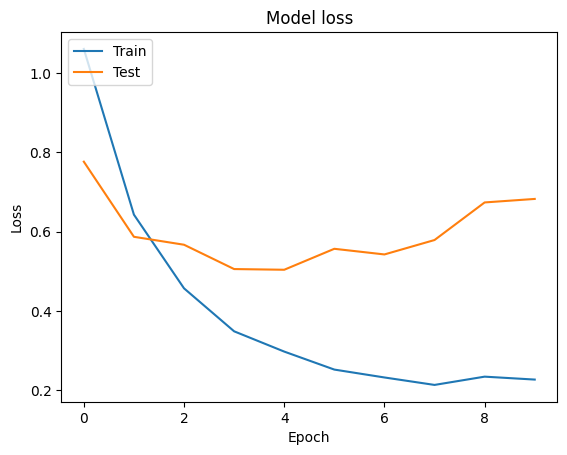

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Predictions on test set

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


## Classification Report


In [ ]:
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       266
           1       0.87      0.88      0.88       285
           2       0.89      0.87      0.88       277

    accuracy                           0.89       828
   macro avg       0.89      0.89      0.89       828
weighted avg       0.89      0.89      0.89       828



## Confusion Matrix

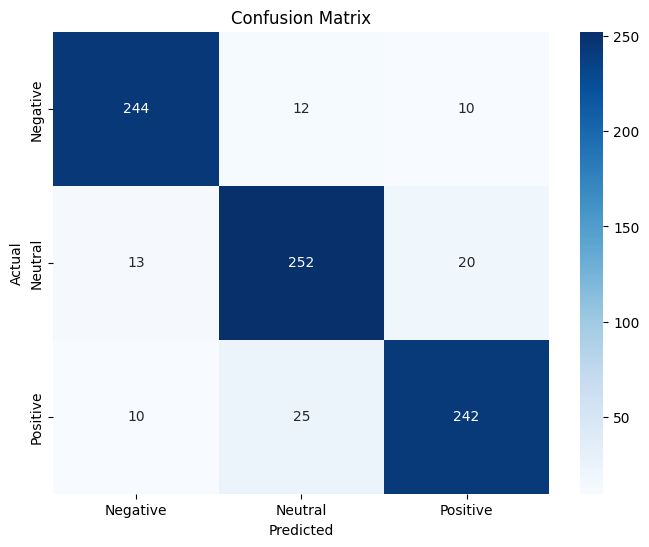

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Receiver Operating Characteristic (ROC) Curves

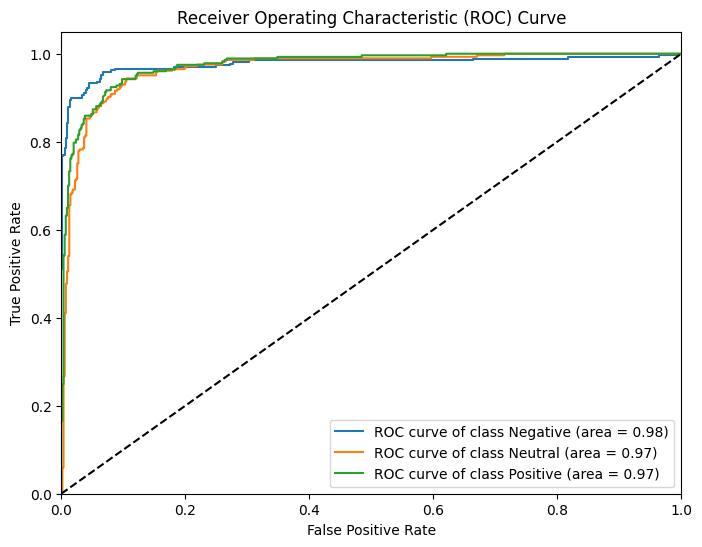

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

# Convert y_test to a one-hot encoded format suitable for roc_curve
y_test_roc = np.argmax(y_test, axis=1)
# Get the number of classes from the shape of y_test
num_classes = y_test.shape[1] # assign num_classes
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc == i, y_pred[:, i]) # Modify roc_curve call
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {le.classes_[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Precision-Recall Curve

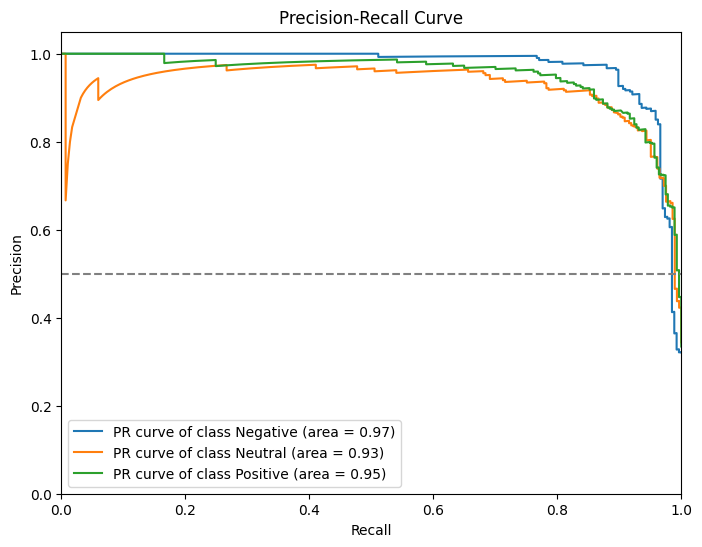

In [ ]:
precision = dict()
recall = dict()
pr_auc = dict()

for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_roc == i, y_pred[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

#Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(recall[i], precision[i], label=f'PR curve of class {le.classes_[i]} (area = {pr_auc[i]:0.2f})')

plt.plot([0, 1], [0.5, 0.5], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Model Test

In [ ]:
new_tweets = ["This is great!", "This is bad!", "go to bed early!"]

# Preprocess the new tweets
new_sequences = tokenizer.texts_to_sequences(new_tweets)
new_padded = pad_sequences(new_sequences, maxlen=max_len)

# Make predictions
new_predictions = model.predict(new_padded)

# Convert probabilities to class labels
new_predicted_classes = np.argmax(new_predictions, axis=1)

# Get the sentiment labels
predicted_sentiments = le.inverse_transform(new_predicted_classes)

# Print the predicted sentiments
for tweet, sentiment in zip(new_tweets, predicted_sentiments):
    print(f"Tweet: {tweet}")
    print(f"Predicted Sentiment: {sentiment}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step
Tweet: This is great!
Predicted Sentiment: Positive

Tweet: This is bad!
Predicted Sentiment: Negative

Tweet: go to bed early!
Predicted Sentiment: Neutral



# Save Model

In [ ]:
RNN=model.save(f'sentiment_analysis_model{accuracy * 100:.2f}acc.h5')

#LSTM Model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# ===== Encode labels =====
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(train_data['sentiment'])
y_val_encoded = label_encoder.transform(val_data['sentiment'])
y_test_encoded = label_encoder.transform(test_dir['sentiment'])

# Convert to one-hot vectors for categorical_crossentropy loss
y_train_cat = to_categorical(y_train_encoded)
y_val_cat = to_categorical(y_val_encoded)
y_test_cat = to_categorical(y_test_encoded)

num_classes = len(train_data['sentiment'].unique())
print("Number of classes:", num_classes)

model_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()


# ===== Train the model =====
history = model_lstm.fit(
    train_padded,
    y_train_cat,
    epochs=5,
    batch_size=128,
    validation_data=(val_padded, y_val_cat),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)],
    verbose=1
)

Number of classes: 3


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
370/370 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.5559 - loss: 0.9157 - val_accuracy: 0.7510 - val_loss: 0.6102
Epoch 2/5
370/370 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7974 - loss: 0.5187 - val_accuracy: 0.7936 - val_loss: 0.5101
Epoch 3/5
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8467 - loss: 0.3934 - val_accuracy: 0.8218 - val_loss: 0.4613
Epoch 4/5
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8770 - loss: 0.3123 - val_accuracy: 0.8297 - val_loss: 0.4431
Epoch 5/5
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8926 - loss: 0.2672 - val_accuracy: 0.8402 - val_loss: 0.4403


In [ ]:
# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1  # optional: prints built-in message when stopping
)

# Define model architecture
model_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_lstm.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train model with early stopping callback
history = model_lstm.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=15,
    batch_size=128,
    callbacks=[early_stop]
)

# Print message if early stopping triggered
if early_stop.stopped_epoch > 0:
    print(f"Training stopped early at epoch {early_stop.stopped_epoch + 1} "
          f"due to no improvement in validation loss for {early_stop.patience} epochs.")
else:
    print("Training completed for all epochs without early stopping.")


Epoch 1/15
370/370 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.5418 - loss: 0.9238 - val_accuracy: 0.7426 - val_loss: 0.6255
Epoch 2/15
370/370 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.7920 - loss: 0.5306 - val_accuracy: 0.7969 - val_loss: 0.5225
Epoch 3/15
370/370 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8437 - loss: 0.3980 - val_accuracy: 0.8252 - val_loss: 0.4496
Epoch 4/15
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8790 - loss: 0.3157 - val_accuracy: 0.8322 - val_loss: 0.4422
Epoch 5/15
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9004 - loss: 0.2584 - val_accuracy: 0.8395 - val_loss: 0.4387
Epoch 6/15
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9131 - loss: 0.2251 - val_accuracy: 0.8469 - val_loss: 0.4338
Epoch 7/15
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9246 - loss: 0.1927 - val_accuracy: 0.8504 - val_loss: 0.4435
Epoch 8/15
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9257 - loss: 0.1881 - val_a

In [ ]:
test_loss, test_acc = model_lstm.evaluate(X_test, y_test_cat, batch_size=128)
print(f"Test Loss: {test_loss *100:.4f}")
print(f"Test Accuracy: {test_acc*100:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9241 - loss: 0.2985 
Test Loss: 29.9010
Test Accuracy: 92.2705


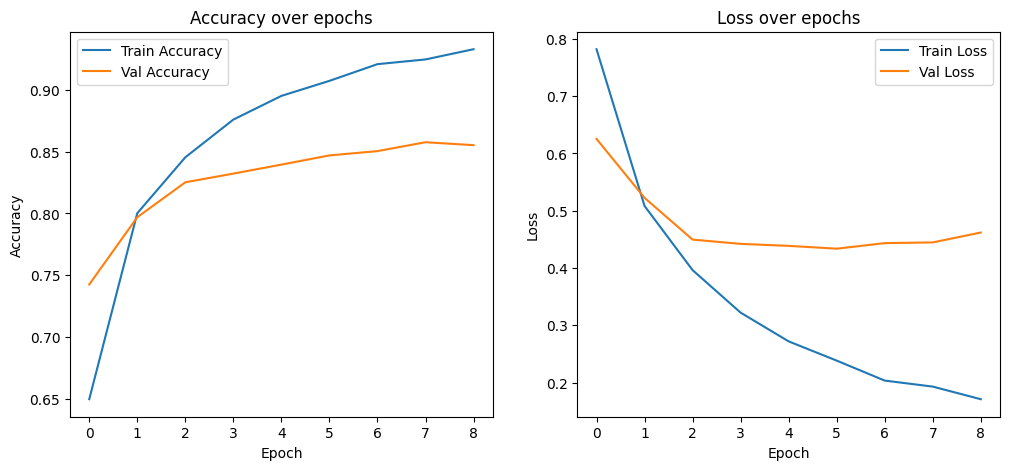

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       266
           1       0.92      0.91      0.92       285
           2       0.93      0.91      0.92       277

    accuracy                           0.92       828
   macro avg       0.92      0.92      0.92       828
weighted avg       0.92      0.92      0.92       828



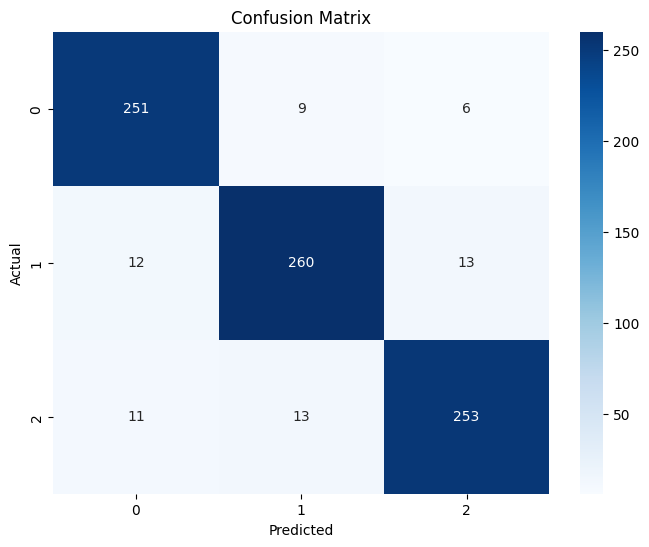

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict class probabilities on test set
y_pred_probs = model_lstm.predict(X_test)

# Convert probabilities to class indices
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print(classification_report(y_true, y_pred))

# Confusion Matrix
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
LSTM=model_lstm.save('lstm_sentiment_model.h5')

In [ ]:
def predict_sentiment(tweet, tokenizer, model, max_len, label_encoder):
    # Make sure tweet is string and clean if needed
    tweet = str(tweet)

    # Tokenize and pad
    seq = tokenizer.texts_to_sequences([tweet])
    padded = pad_sequences(seq, maxlen=max_len)

    # Predict
    pred = model.predict(padded)

    # Get the index of the highest probability
    pred_class_idx = pred.argmax(axis=1)[0]

    # Convert back to label
    pred_label = label_encoder.inverse_transform([pred_class_idx])[0]

    return pred_label


In [ ]:
sample_tweets = [
    "Just nailed my presentation! Feeling on top of the world. 🌟",  # Positive
    "The meeting went okay, nothing exciting to report.",            # Neutral
    "Honestly, the service here is awful and I’m so frustrated.",    # Negative
    "Did you see the new update? Check out the website for details." # Netural
]

for tweet in sample_tweets:
    pred = predict_sentiment(tweet, tokenizer, model_lstm, max_len, label_encoder)
    print(f"Tweet: {tweet}\nPredicted Sentiment: {pred}\n{'-'*50}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Tweet: Just nailed my presentation! Feeling on top of the world. 🌟
Predicted Sentiment: Positive
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Tweet: The meeting went okay, nothing exciting to report.
Predicted Sentiment: Neutral
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Tweet: Honestly, the service here is awful and I’m so frustrated.
Predicted Sentiment: Positive
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Tweet: Did you see the new update? Check out the website for details.
Predicted Sentiment: Neutral
--------------------------------------------------


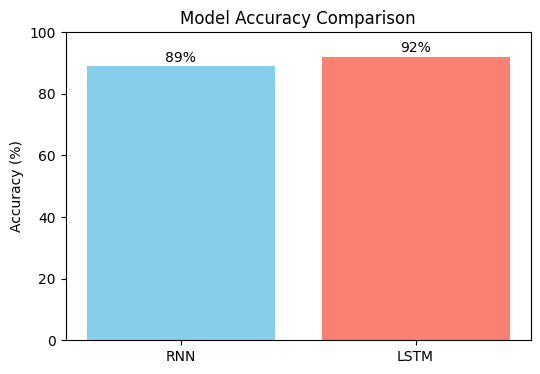

In [ ]:
import matplotlib.pyplot as plt

# Your model names and accuracies (in %)
models = ['RNN', 'LSTM']
accuracies = [89, 92]

plt.figure(figsize=(6,4))
bars = plt.bar(models, accuracies, color=['skyblue', 'salmon'])

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval}%", ha='center', va='bottom')

plt.ylim(0, 100)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.show()
